[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/MagicWhitePowder.ipynb)

In [2]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from bs4 import BeautifulSoup
from tqdm.auto import tqdm

# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [67]:
# Из данных есть:
# Котировки нефти, курс eur/usd
# dbc = pd.read_excel('cur_oil.xlsx')

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [37]:
# Тикеры
# нефть 'CL=F'
# курс евро к доллару 'EURUSD=X'
# курс евро к рублю 'EURRUB=X'
# курс доллара к рублю 'USDRUB=X'

In [8]:
df = yf.download('CL=F')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-28,110.180000,112.220001,109.620003,111.760002,111.760002,306748
2022-06-29,111.860001,114.050003,109.220001,109.779999,109.779999,322060
2022-06-30,109.699997,110.449997,105.099998,105.760002,105.760002,362890
2022-07-01,106.010002,109.339996,104.559998,108.430000,108.430000,362890
2022-07-04,108.800003,110.769997,107.250000,110.500000,110.500000,100221


In [9]:
crud_oil_prices = df.Close.copy()

In [11]:
crud_oil_prices.loc['2000-08-23']

32.04999923706055

In [12]:
crud_oil_prices.loc['2000-08-23':'2000-08-24']

Date
2000-08-23    32.049999
2000-08-24    31.629999
Name: Close, dtype: float64

In [14]:
crud_oil_prices.resample('M').mean()

Date
2000-08-31     32.545714
2000-09-30     33.871000
2000-10-31     32.973182
2000-11-30     34.264500
2000-12-31     28.355000
                 ...    
2022-03-31    108.262174
2022-04-30    101.640499
2022-05-31    109.259523
2022-06-30    114.154091
2022-07-31    109.465000
Freq: M, Name: Close, Length: 264, dtype: float64

In [15]:
exr_eurusd = yf.download( 'EURUSD=X')
exr_usdrub = yf.download('USDRUB=X')
exr_eurrub = yf.download('EURRUB=X')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
df_dict = {}
for ticker in tqdm(['CL=F','USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df = yf.download(ticker)
    df = df.Close.copy()
    df = df.resample('M').mean()
    df_dict[ticker] = df

  0%|          | 0/4 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
main_df = pd.concat(df_dict.values(), axis=1)
main_df.columns = ['CRUDE_OIL_USD','USDRUB', 'EURUSD', 'EURRUB']

In [39]:
# df_dict.get('CL=F')

In [40]:
main_df = main_df.loc['2019-06-30':'2022-06-30'].copy()

In [42]:
main_df['MWP_PRICE_EUR'] = main_df.CRUDE_OIL_USD*16 * (1/main_df.EURUSD) + 400

In [43]:
main_df['MWP_PRICE_USD'] = main_df.CRUDE_OIL_USD*16 + 400 * main_df.EURUSD

In [44]:
# 54.706500 * (1/1.129002) * 16 + 400
# 54.706500 * (1/1.129002)
# 400 *  1.129002

In [48]:
# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах


In [49]:
main_df['MWP_PRICE_EUR_EU'] = main_df['MWP_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['MWP_PRICE_USD_CN'] = main_df['MWP_PRICE_USD'] + CN_LOGISTIC_COST_USD

In [56]:
main_df

,CRUDE_OIL_USD,USDRUB,EURUSD,EURRUB,MWP_PRICE_EUR,MWP_PRICE_USD,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_EUR_EU_MA
Date,,,,,,,,,
2019-06-30,54.706500,64.168690,1.129002,72.458005,1175.290064,1326.904789,1205.290064,1456.904789,NaN
2019-07-31,57.546364,63.176222,1.122682,70.956822,1220.127257,1369.814481,1250.127257,1499.814481,NaN
2019-08-31,54.844091,65.687992,1.113163,73.143709,1188.298999,1322.770735,1218.298999,1452.770735,1224.572106
2019-09-30,56.967000,64.971148,1.101377,71.589861,1227.574949,1352.022793,1257.574949,1482.022793,1242.000402
2019-10-31,54.005653,64.341009,1.104839,71.093322,1182.096026,1306.026169,1212.096026,1436.026169,1229.323324
2019-11-30,57.070000,63.833124,1.105471,70.593953,1226.001103,1355.308273,1256.001103,1485.308273,1241.890693
2019-12-31,59.804762,62.899559,1.110955,69.886841,1261.309490,1401.258241,1291.309490,1531.258241,1253.135540
2020-01-31,57.528572,61.828313,1.111180,68.664805,1228.359873,1364.929260,1258.359873,1494.929260,1268.556822
2020-02-29,50.542105,63.991130,1.091091,69.840279,1141.160840,1245.109950,1171.160840,1375.109950,1240.276734


In [55]:
main_df['MWP_PRICE_EUR_EU_MA'] = main_df.MWP_PRICE_EUR_EU.rolling(window=3).mean()

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

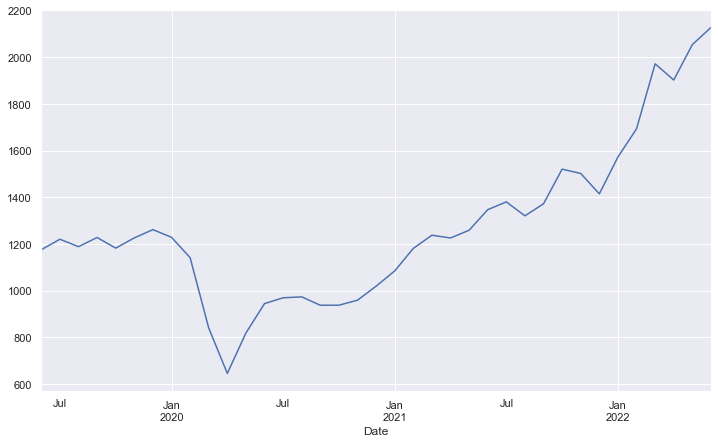

In [65]:
# График с базовой ценой(на заводе) в евро
main_df['MWP_PRICE_EUR'].plot();

In [68]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'comment': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'comment': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'comment': 'monthly'}}

In [69]:
discounts

{'up to 100': 0.01, 'up to 300': 0.05, '300 plus': 0.1}

In [70]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

In [ ]:
for client ,v in customers.items():
    location = client.get('location')
    disc = 0
    if client.get('location') == "EU":
        for k_lim, discount_share in discounts.items():
            if client.get('volumes') > k_lim:
                continue
            else:
               disc = discount_share
    elif client.get('location') == 'CN':
        pass

# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [ ]:
# 

# Задание 3. Back to Russia

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [ ]:
# 

# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [ ]:
# 

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# import yourpackage

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage